In [1]:
import numpy as np
import math
from penrose import RobinsonTriangle, FatRhombus, SkinnyRhombus, point, remove_dupes, make_svg, write_svg, PSI, translate
import cv2
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
from IPython.display import SVG, display
def show_svg(path:Path):
    display(SVG(path))

In [3]:
def find_minmax(tiling:list[RobinsonTriangle]):
    minx = tiling[0].a.real
    maxx = minx
    miny = tiling[0].a.imag
    maxy = miny

    for t in tiling:
        new_minx = np.min([t.a.real, t.b.real, t.c.real])
        new_maxx = np.max([t.a.real, t.b.real, t.c.real])
        new_miny = np.min([t.a.imag, t.b.imag, t.c.imag])
        new_maxy = np.max([t.a.imag, t.b.imag, t.c.imag])

        if new_minx < minx:
            minx = new_minx
        if new_maxx > maxx:
            maxx = new_maxx
        if new_miny < miny:
            miny = new_miny
        if new_maxy > maxy:
            maxy = new_maxy
    
    return minx, maxx, miny, maxy


In [4]:
scale = 2000.0
N = 8

theta = 2 * np.pi / 5
rot = np.cos(theta) + 1j * np.sin(theta)

a = point(-scale / 2, 0)
b = scale / 2 * rot
c = point(scale / 2 / PSI, 0)

tri = FatRhombus(a, b, c)
tiling: list[RobinsonTriangle] = [tri]

# Inflate N times. Remove duplicates after each generation.
for _ in range(N):
    inflated = []
    for t in tiling:
        inflated.extend(t.inflate())
    tiling = inflated

tiling = remove_dupes(tiling)

# Add conjugate elements to reflect across the x axis
conj = [t.conjugate() for t in tiling]
tiling = remove_dupes(tiling + conj)


In [5]:
# Normalize the tiles

# Rotate so the tiles line up better with rectangular images.
theta = np.pi / 5.0
rot_tiles = [t.rotate(theta) for t in tiling]

minx, maxx, miny, maxy = find_minmax(rot_tiles)
print(minx, maxx, miny, maxy)
x_amount = (minx + maxx) / -2
y_amount = (miny + maxy) / -2
amount = point(x_amount, y_amount)

img_tiles = [t.translate(amount) for t in rot_tiles]

minx, maxx, miny, maxy = find_minmax(img_tiles)
print(minx, maxx, miny, maxy)



-809.0169943749474 1309.0169943749472 -587.7852522924733 951.0565162951536
-1059.0169943749474 1059.0169943749474 -769.4208842938135 769.4208842938135


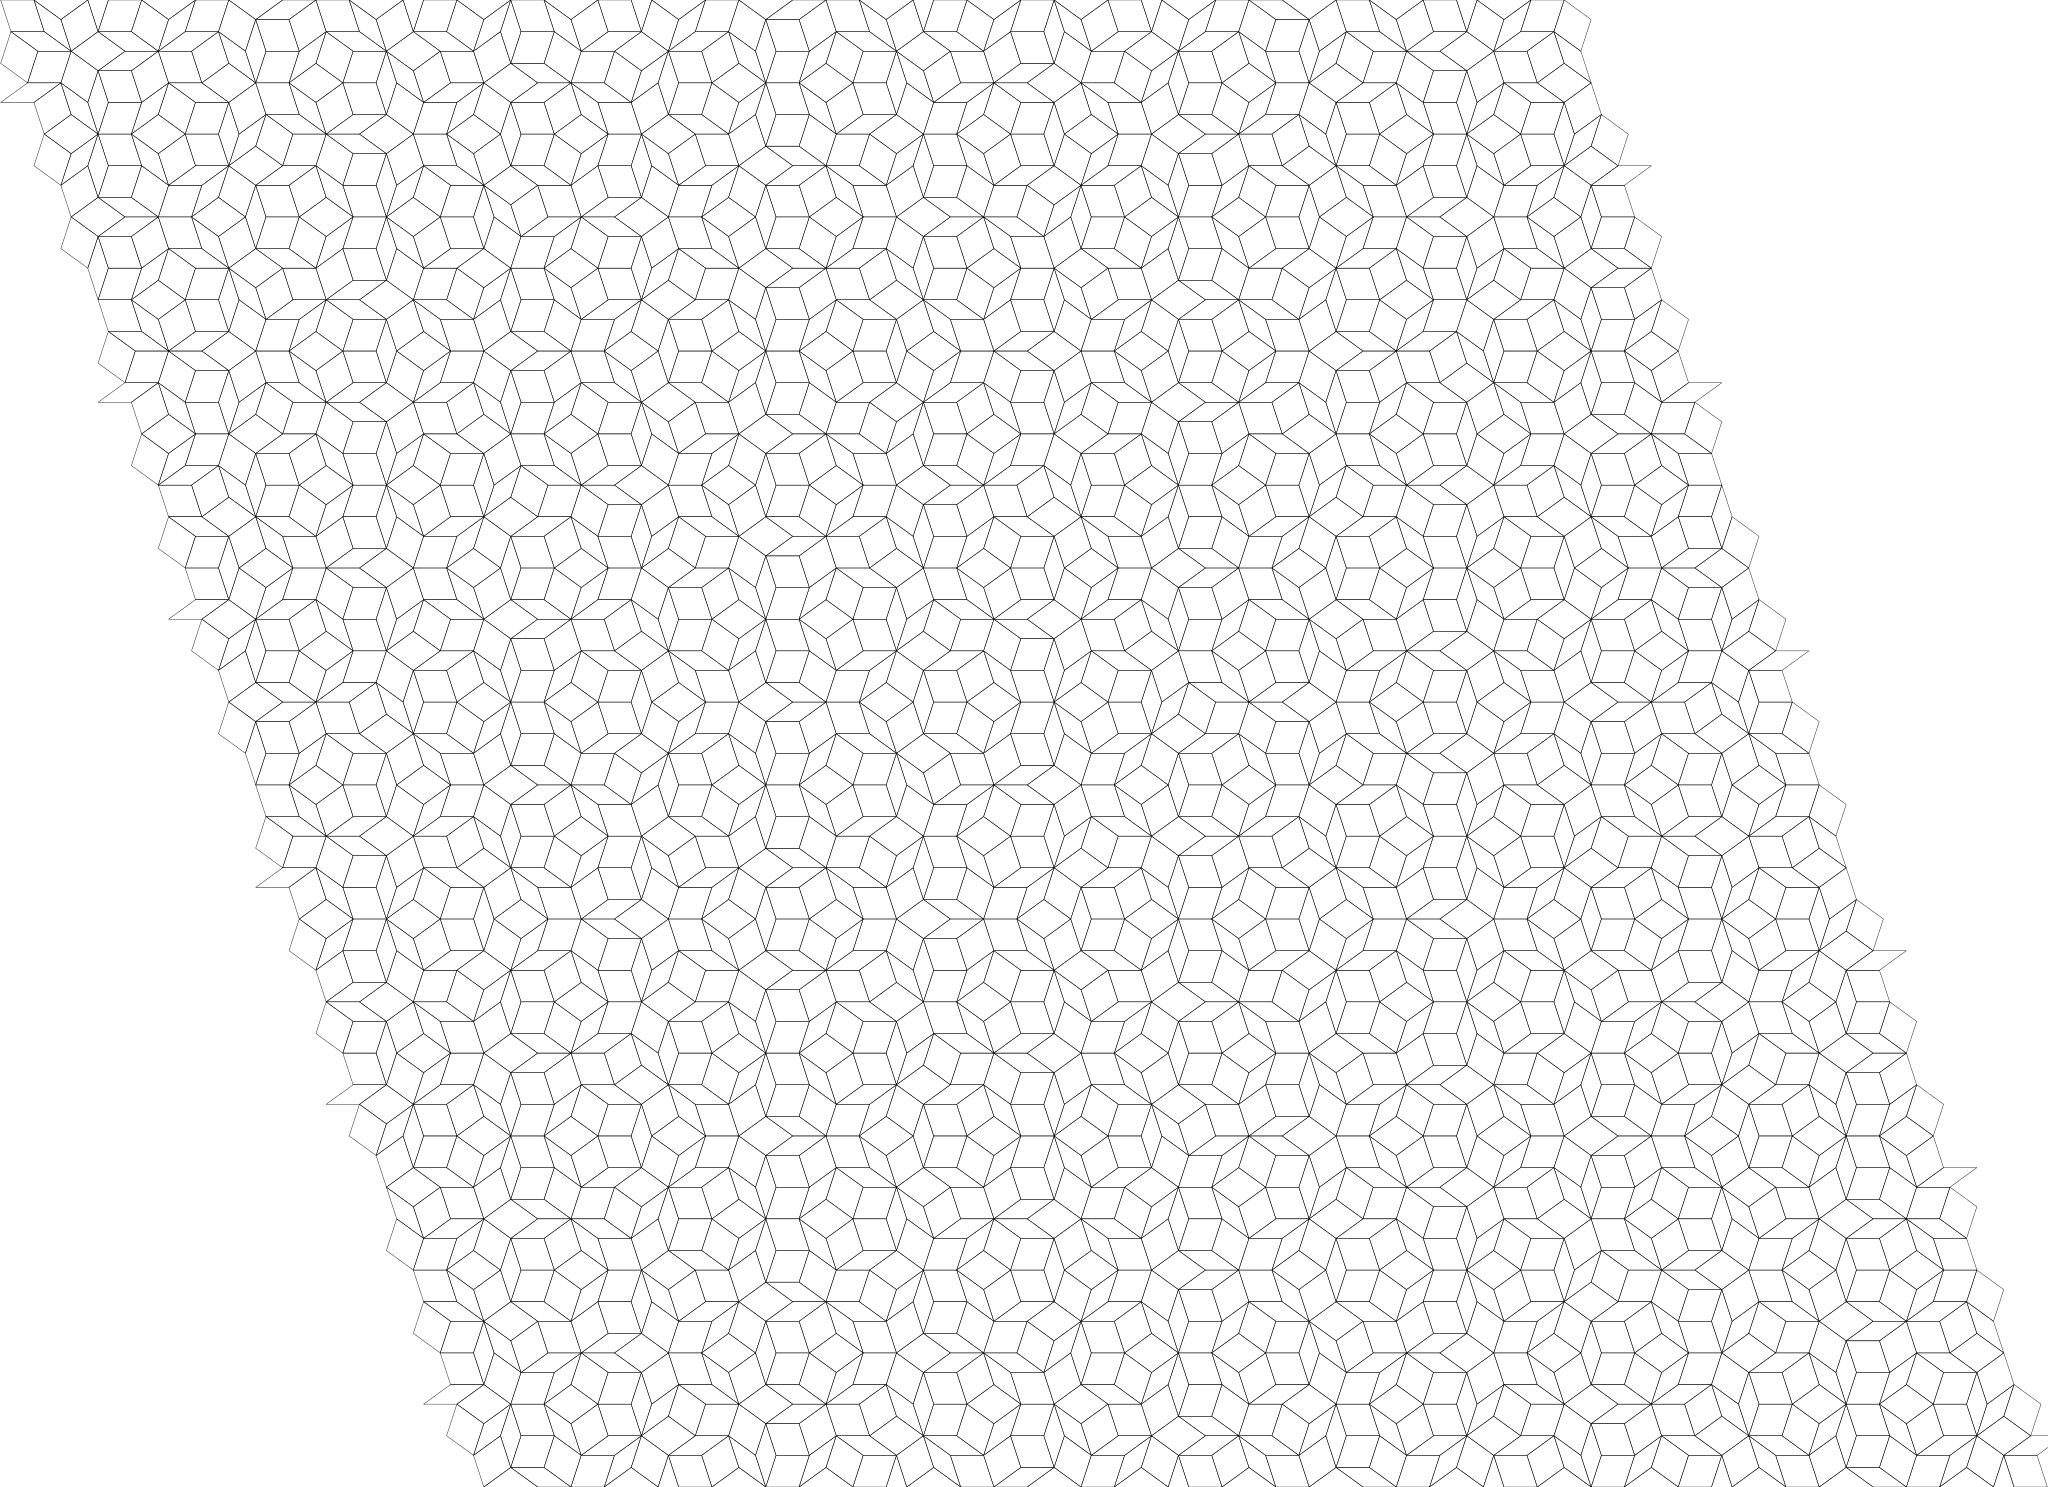

In [6]:

stroke_width = str(PSI**N * scale * 0.01)

# Make svg
svg = make_svg(
    img_tiles,
    minx=minx,
    maxx=maxx,
    miny=miny,
    maxy=maxy,
    stroke_width=stroke_width
)
write_svg(svg, Path("foo.svg"))
show_svg(Path("foo.svg"))

(608, 1080, 3)


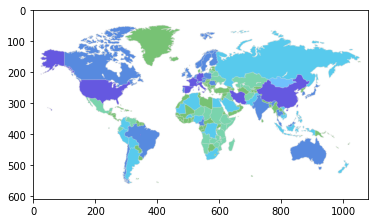

In [8]:
image = cv2.imread("map.png")
print(image.shape)
plt.imshow(image)
plt.show()